In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import shuffle
from IPython.display import display, HTML

In [2]:
df = shuffle(pd.read_csv('data/train.csv'))
df['avg_price'] = df['total_price']/df['building_area']

In [3]:
class_column = ['building_material','total_floor', 'txn_floor', 'city', 'town', 'village', 'building_type', 'building_use', 'parking_way', 'I_index_50', 'I_index_500', 'I_index_1000', 'I_index_5000', 'I_index_10000', 'II_index_50', 'II_index_500', 'II_index_1000', 'II_index_5000', 'II_index_10000', 'III_index_50', 'III_index_500', 'III_index_1000', 'III_index_5000', 'III_index_10000', 'IV_index_50', 'IV_index_500', 'IV_index_1000', 'IV_index_5000', 'IV_index_10000', 'V_index_50', 'V_index_500', 'V_index_1000', 'V_index_5000', 'V_index_10000', 'VI_index_50', 'VI_index_500', 'VI_index_1000', 'VI_index_5000', 'VI_index_10000', 'VII_index_50', 'VII_index_500', 'VII_index_1000', 'VII_index_5000', 'VII_index_10000', 'VIII_index_50', 'VIII_index_500', 'VIII_index_1000', 'VIII_index_5000', 'VIII_index_10000', 'IX_index_50', 'IX_index_500', 'IX_index_1000', 'IX_index_5000', 'IX_index_10000', 'X_index_50', 'X_index_500', 'X_index_1000', 'X_index_5000', 'X_index_10000', 'XI_index_50', 'XI_index_500', 'XI_index_1000', 'XI_index_5000', 'XI_index_10000', 'XII_index_50', 'XII_index_500', 'XII_index_1000', 'XII_index_5000', 'XII_index_10000', 'XIII_index_50', 'XIII_index_500', 'XIII_index_1000', 'XIII_index_5000', 'XIII_index_10000', 'XIV_index_50', 'XIV_index_500', 'XIV_index_1000', 'XIV_index_5000', 'XIV_index_10000']
data_table = {}

for col in class_column:
    data_table[col] = {}
    remove_na_df = df[np.isfinite(df[col])]
    outlier_index = np.where(np.abs(stats.zscore(remove_na_df['avg_price'])) > 3)[0]
    data_table[col]['data'] = remove_na_df['avg_price'].drop(remove_na_df.index[outlier_index]).values
    data_table[col]['label'] = remove_na_df[col].drop(remove_na_df.index[outlier_index]).values
    

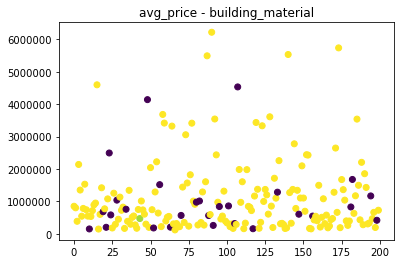

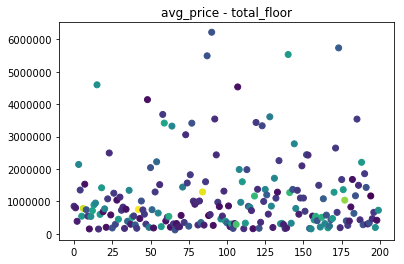

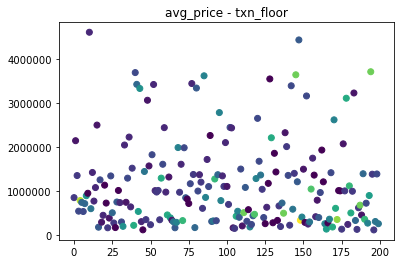

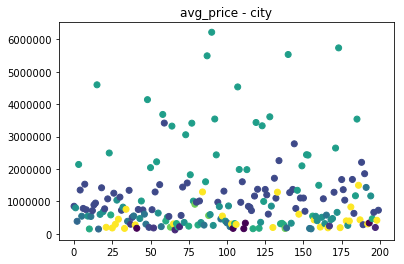

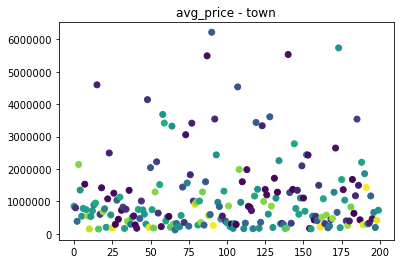

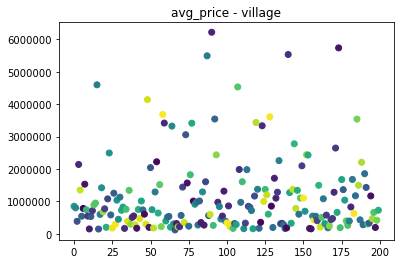

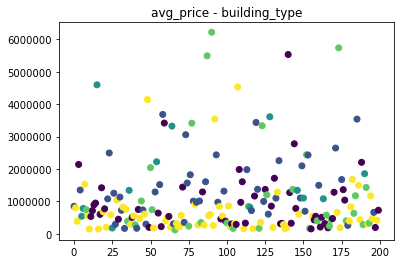

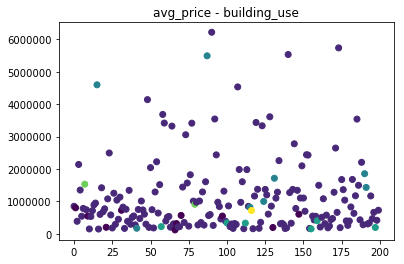

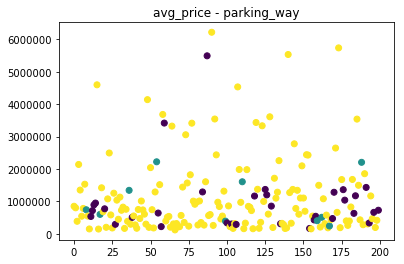

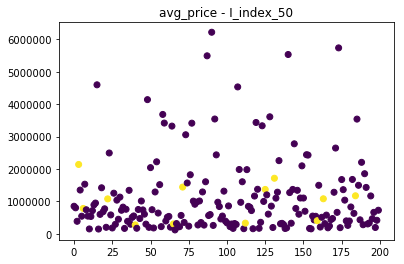

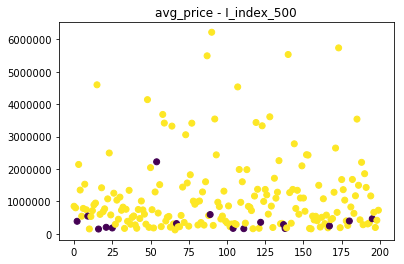

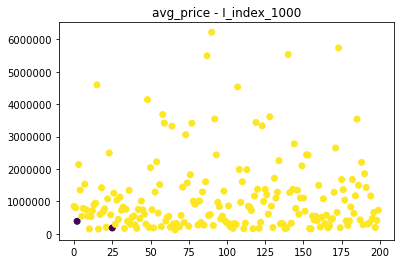

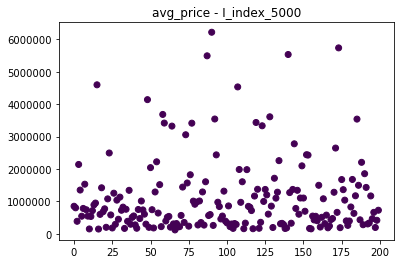

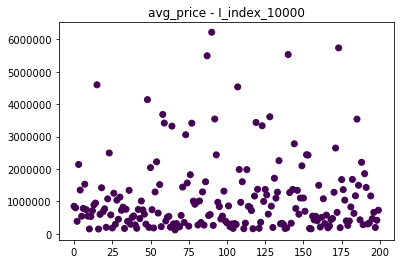

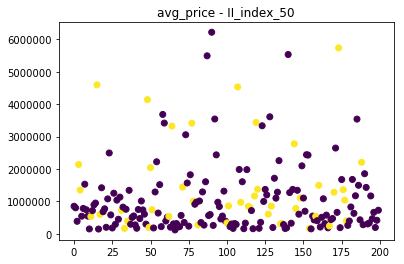

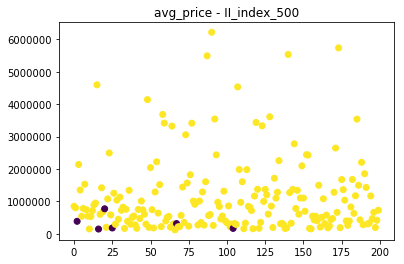

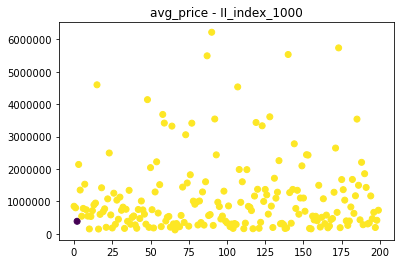

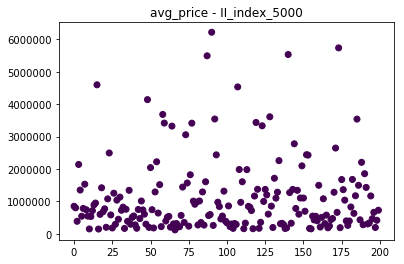

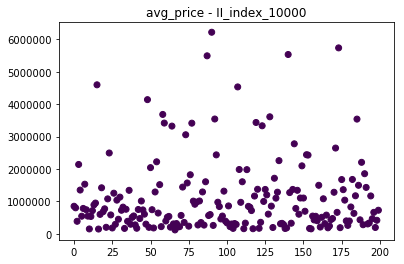

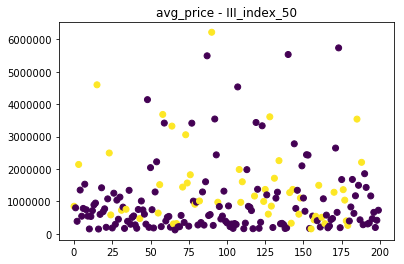

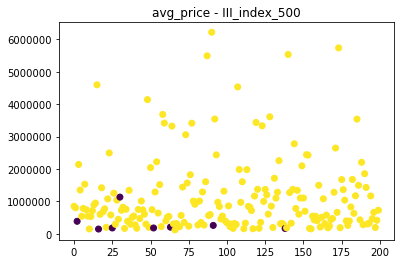

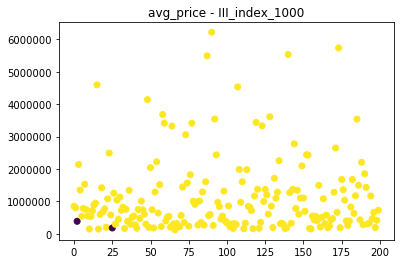

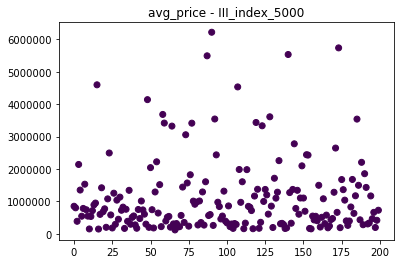

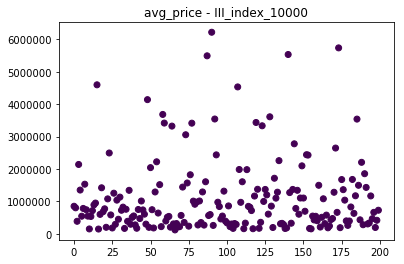

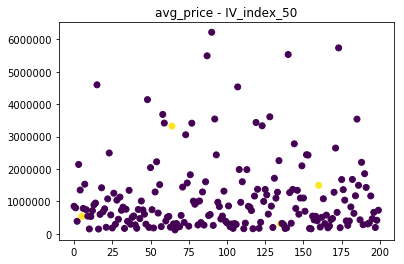

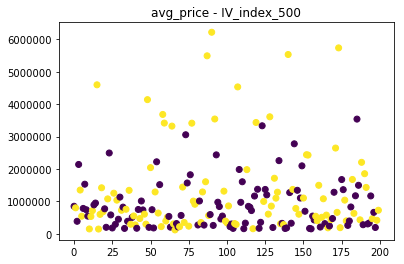

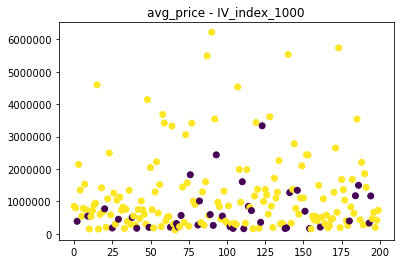

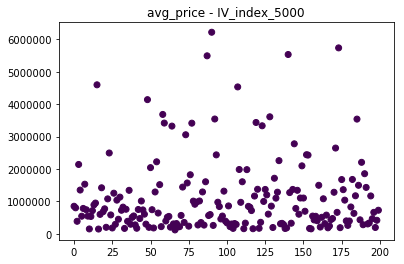

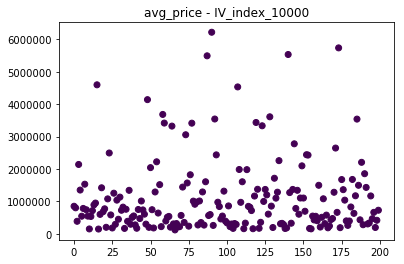

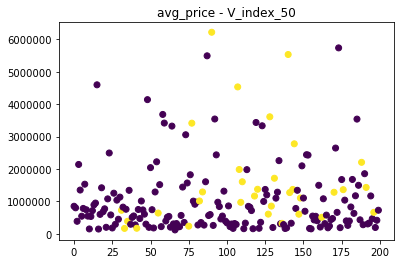

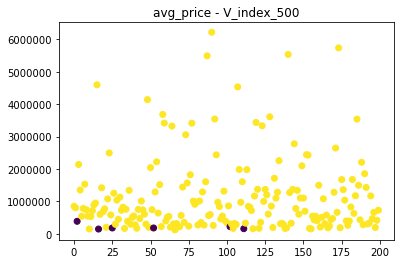

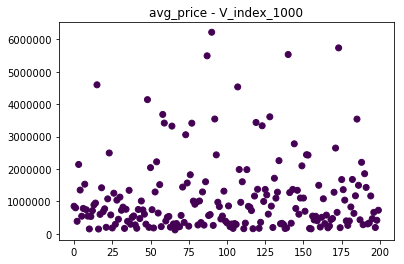

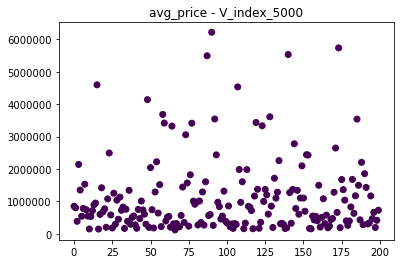

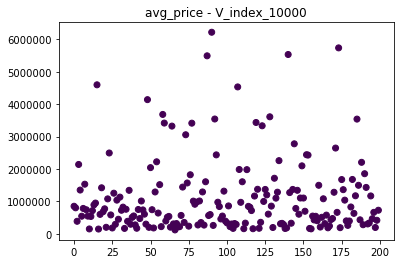

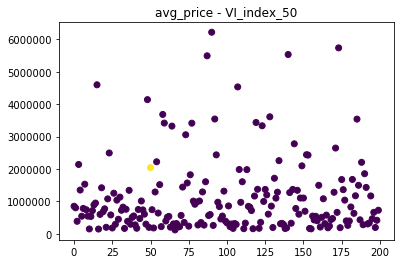

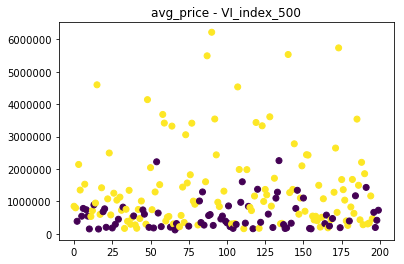

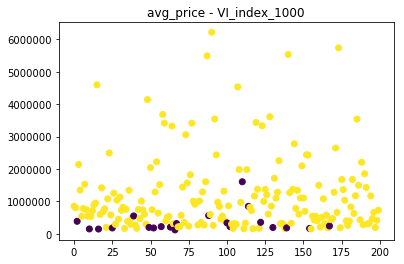

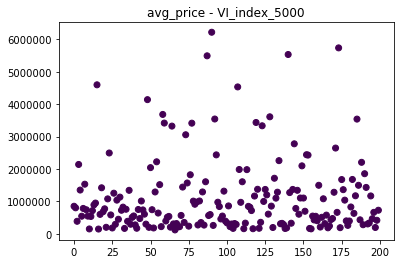

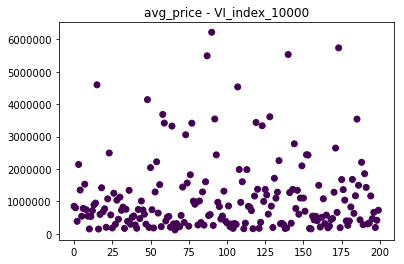

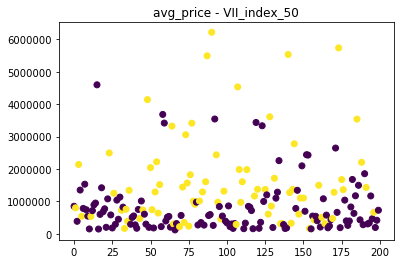

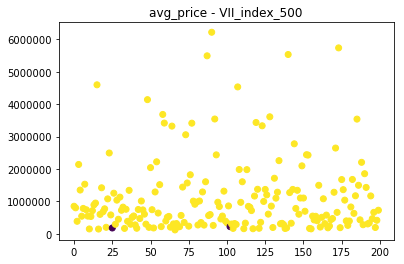

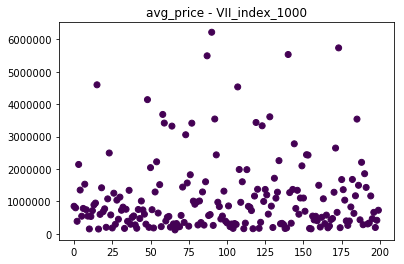

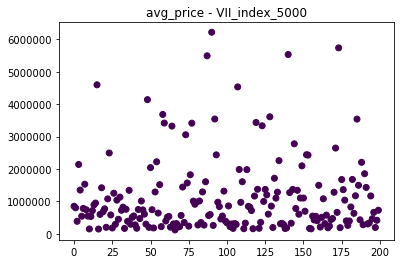

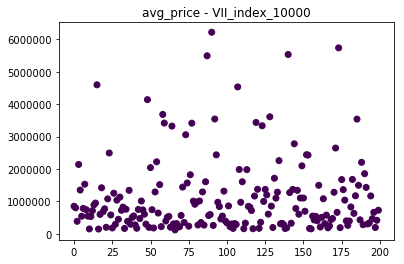

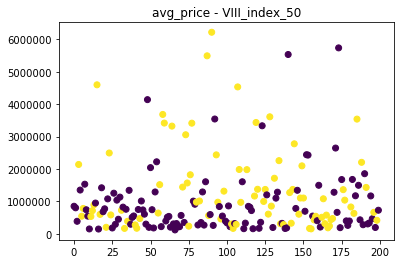

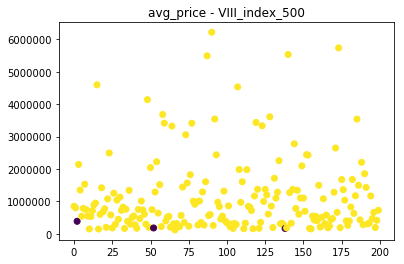

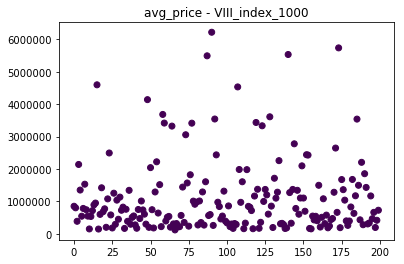

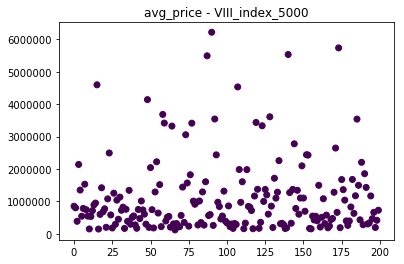

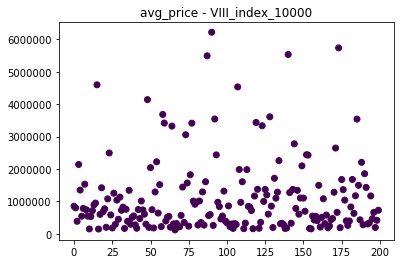

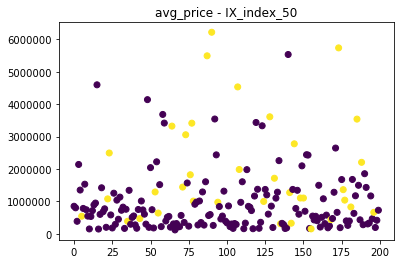

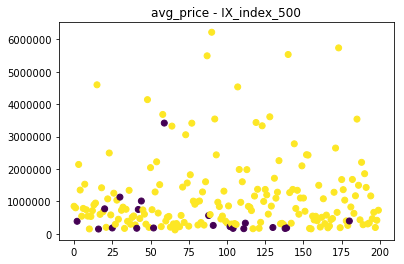

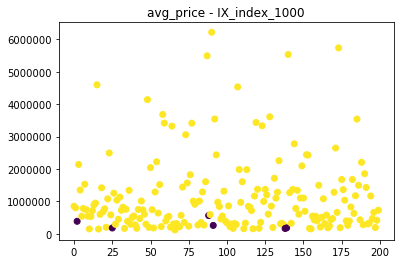

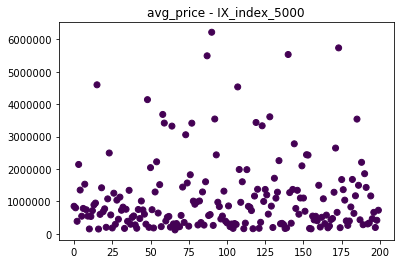

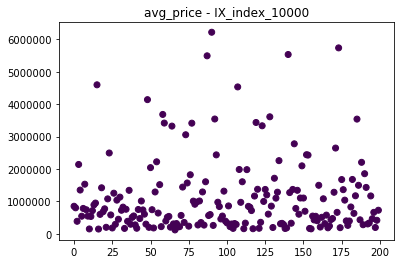

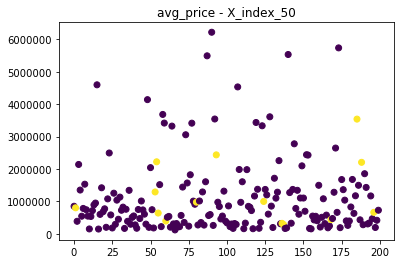

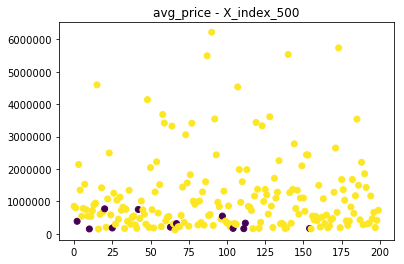

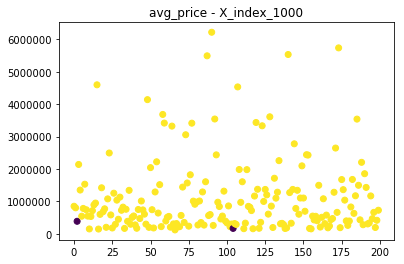

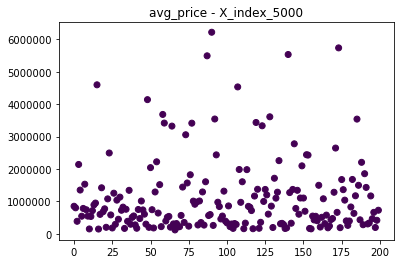

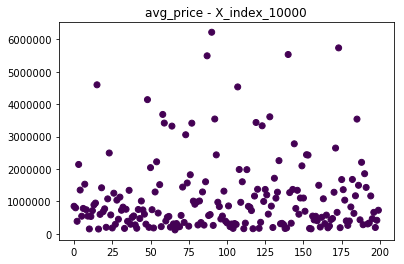

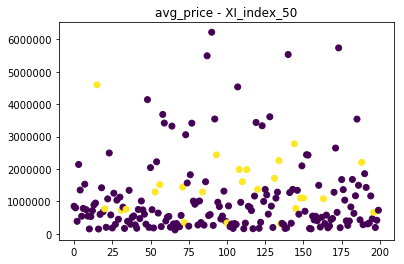

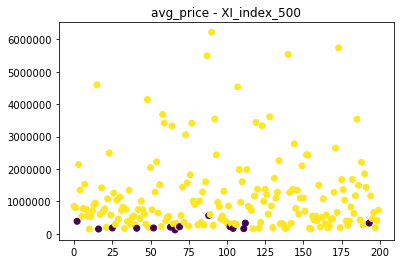

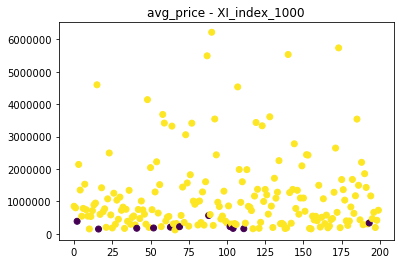

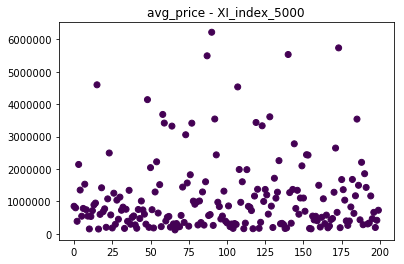

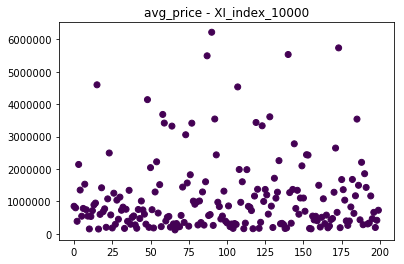

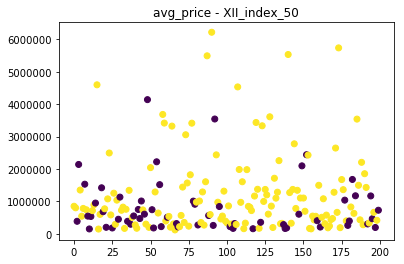

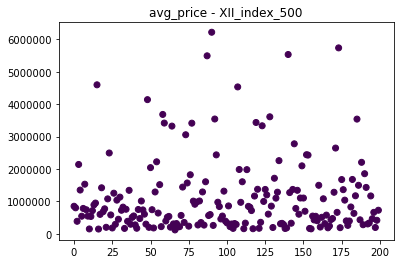

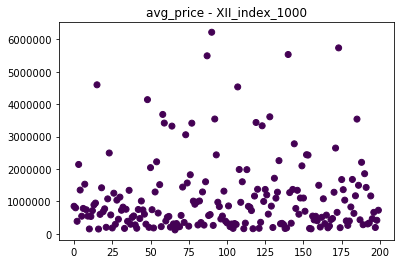

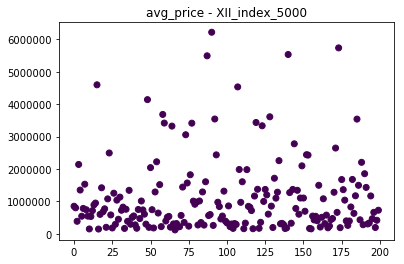

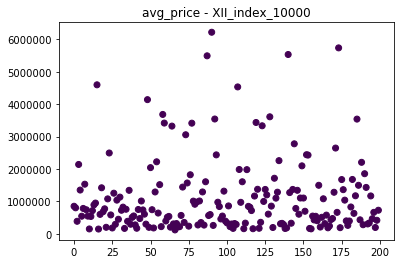

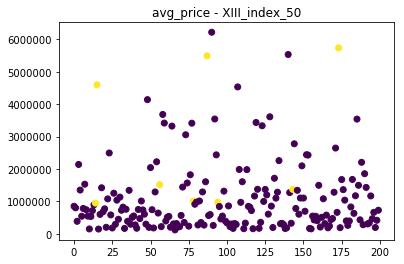

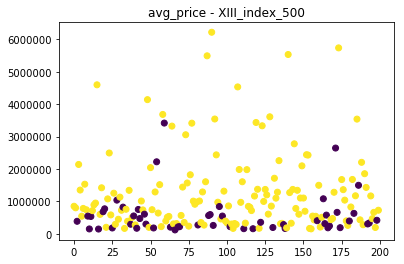

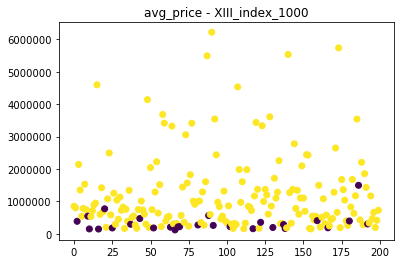

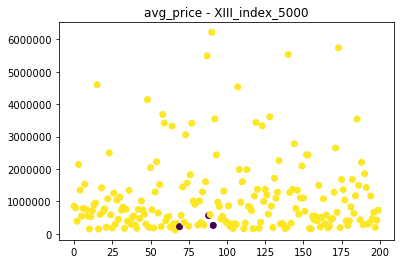

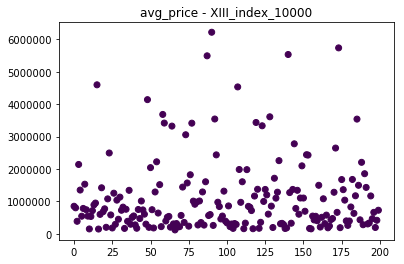

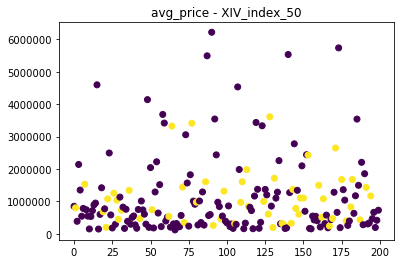

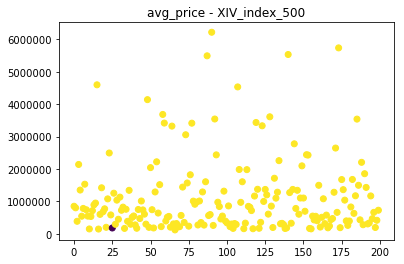

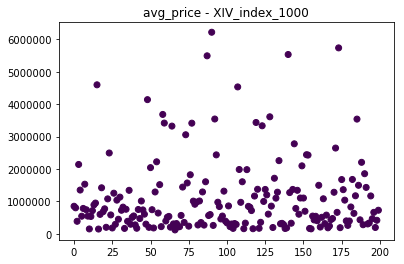

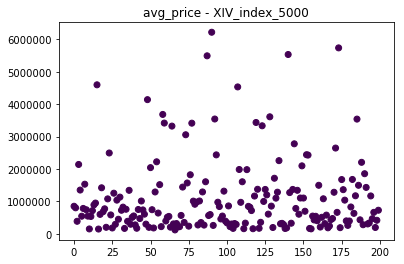

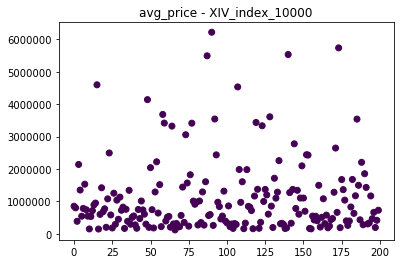

In [4]:
for col in class_column:
    data = data_table[col]['data']
    label = data_table[col]['label']
    sample_data = data[:200]
    sample_label = label[:200]
    x = np.array(range(len(sample_data)))
    plt.scatter(x, sample_data, c=sample_label)
    plt.title(f"avg_price - {col}")
    plt.savefig(f"images/avg_price - {col}.png")
    plt.show()

In [5]:
for col in class_column:
    data_table[col] = {}
    remove_na_df = df[np.isfinite(df[col])]
    outlier_index = np.where(np.abs(stats.zscore(remove_na_df['avg_price'])) > 3)[0]
    clean_data = remove_na_df.drop(remove_na_df.index[outlier_index])
    stat_data = clean_data.groupby(col).agg({'avg_price':['var','mean','sum','max','min','median']
                                            })
    display(stat_data)

avg_price                                            \
                            var          mean           sum           max   
building_material                                                           
1                  1.174454e+12  1.028612e+06  6.490543e+09  7.800671e+06   
3                  2.125381e+12  1.335134e+06  9.345941e+06  3.655806e+06   
4                  5.684020e+11  7.206342e+05  1.441268e+06  1.253739e+06   
5                  1.716693e+11  4.116144e+06  8.232288e+06  4.409119e+06   
7                  4.864321e+11  5.685509e+05  2.126380e+08  4.783284e+06   
8                  1.342606e+12  1.143116e+06  5.998385e+10  7.803382e+06   
9                  2.229151e+12  1.845186e+06  2.915394e+08  7.740229e+06   
10                 3.137736e+12  2.612954e+06  1.105280e+09  7.792565e+06   
11                 1.244192e+11  1.354656e+06  5.418624e+06  1.638213e+06   

                                               
                            min        median  
building_material                              
1                  3.577228e+04  6.682133e+05  
3                  1.279934e+05  3.069013e+05  
4                  1.875291e+05  7.206342e+05  
5                  3.823168e+06  4.116144e+06  
7                  4.680364e+04  3.332784e+05  
8                  2.284445e+04  7.527231e+05  
9                  1.461619e+05  1.438840e+06  
10                 1.361825e+05  2.124899e+06  
11                 8.390059e+05  1.470702e+06

avg_price                                            \
                      var          mean           sum           max   
total_floor                                                           
1            1.735801e+12  1.157477e+06  3.136764e+08  7.584107e+06   
2            8.431047e+11  7.442199e+05  3.935435e+09  7.752093e+06   
3            4.553853e+11  5.966303e+05  2.673500e+09  7.362886e+06   
4            1.117617e+12  1.103027e+06  1.172628e+10  7.800671e+06   
5            8.165281e+11  1.116562e+06  1.252782e+10  7.156711e+06   
6            2.366799e+12  1.466574e+06  1.968143e+09  7.783519e+06   
7            2.762541e+12  1.672498e+06  8.098235e+09  7.770784e+06   
8            1.067824e+12  9.871190e+05  1.610978e+09  7.052641e+06   
9            1.434223e+12  1.210640e+06  1.648892e+09  7.338407e+06   
10           1.502362e+12  1.268951e+06  1.775263e+09  6.942359e+06   
11           2.318600e+12  1.628156e+06  2.132884e+09  7.741865e+06   
12           2.022482e+12  1.424941e+06  5.775284e+09  7.705373e+06   
13           1.620073e+12  1.223948e+06  2.360995e+09  7.732452e+06   
14           1.682371e+12  1.247600e+06  4.840687e+09  7.803382e+06   
15           9.762105e+11  1.064423e+06  2.219322e+09  7.774504e+06   
16           8.979441e+11  9.233677e+05  9.372183e+08  6.865856e+06   
17           1.388953e+12  1.133101e+06  5.416225e+08  6.995679e+06   
18           3.405923e+11  9.863332e+05  3.708613e+08  2.945245e+06   
19           4.143435e+11  1.072424e+06  5.565882e+08  3.834397e+06   
20           5.350253e+11  9.999300e+05  2.909796e+08  3.495053e+06   
21           5.896575e+11  1.188870e+06  2.746290e+08  3.659406e+06   
22           3.600758e+11  1.128547e+06  3.363071e+08  2.870515e+06   
23           5.870814e+11  1.173396e+06  2.628407e+08  3.708901e+06   
24           5.455911e+11  1.324054e+06  3.442540e+08  4.239237e+06   
25           5.433202e+11  1.464770e+06  1.904201e+08  3.682599e+06   
26           2.239987e+12  1.913457e+06  1.607304e+08  6.318147e+06   
27           3.230721e+11  1.597322e+06  3.833574e+07  2.886451e+06   
28           1.570766e+12  2.001232e+06  1.941195e+08  4.392460e+06   
29           5.342787e+10  9.923718e+05  1.984744e+06  1.155816e+06   

                                          
                       min        median  
total_floor                               
1             75508.422316  6.669317e+05  
2             35772.280519  4.288986e+05  
3             35736.478497  3.858058e+05  
4             22844.447001  7.479615e+05  
5             29638.472250  9.619623e+05  
6             54542.632662  9.256670e+05  
7             47869.589399  1.090595e+06  
8             57606.948559  5.766475e+05  
9            110385.498655  8.035369e+05  
10            60308.711384  8.211890e+05  
11            76680.032271  1.196077e+06  
12            28537.167443  9.512514e+05  
13            30492.139935  7.941069e+05  
14           101229.922166  7.244406e+05  
15            79247.013272  7.244084e+05  
16            97120.163761  5.704289e+05  
17            50766.178265  7.731236e+05  
18           145801.925510  9.052042e+05  
19           133375.353505  9.300924e+05  
20           146452.459204  7.286513e+05  
21           156964.634340  1.037574e+06  
22           158423.247511  1.234068e+06  
23           167538.502790  9.584818e+05  
24           190435.350260  1.212274e+06  
25           481901.722437  1.313195e+06  
26           165191.492494  1.473228e+06  
27           678159.258031  1.490761e+06  
28           232630.283199  1.598305e+06  
29           828927.780797  9.923718e+05

avg_price                                            \
                    var          mean           sum           max   
txn_floor                                                           
1.0        1.345082e+12  1.526360e+06  7.787489e+09  5.441691e+06   
2.0        1.089860e+12  1.282125e+06  6.960657e+09  5.467841e+06   
3.0        1.026861e+12  1.230913e+06  7.456873e+09  5.456638e+06   
4.0        1.089661e+12  1.228415e+06  7.777097e+09  5.458131e+06   
5.0        1.096042e+12  1.157777e+06  5.793517e+09  5.467735e+06   
6.0        1.302892e+12  1.187249e+06  3.207946e+09  5.448893e+06   
7.0        1.405005e+12  1.245430e+06  3.129764e+09  5.456638e+06   
8.0        1.104905e+12  1.158402e+06  2.022570e+09  5.430503e+06   
9.0        1.179996e+12  1.182606e+06  1.890986e+09  5.442356e+06   
10.0       1.190859e+12  1.159552e+06  1.691786e+09  5.442232e+06   
11.0       1.204577e+12  1.203038e+06  1.640944e+09  5.422639e+06   
12.0       1.094726e+12  1.131219e+06  1.321263e+09  5.435159e+06   
13.0       9.579229e+11  1.109615e+06  8.621708e+08  5.395855e+06   
14.0       8.888170e+11  1.092092e+06  7.284252e+08  5.442356e+06   
15.0       7.821909e+11  1.088289e+06  4.429337e+08  5.411748e+06   
16.0       7.302105e+11  1.070573e+06  2.515846e+08  4.695170e+06   
17.0       8.213770e+11  1.226504e+06  1.999202e+08  5.391408e+06   
18.0       6.510466e+11  1.288328e+06  1.868076e+08  3.495053e+06   
19.0       7.120994e+11  1.354606e+06  1.517158e+08  3.848385e+06   
20.0       6.153150e+11  1.277377e+06  9.452591e+07  3.614212e+06   
21.0       3.560104e+11  1.282950e+06  7.312814e+07  2.886451e+06   
22.0       4.216982e+11  1.176741e+06  5.295335e+07  2.921398e+06   
23.0       1.079400e+12  1.505697e+06  7.076777e+07  4.912034e+06   
24.0       6.047377e+11  1.459342e+06  2.626816e+07  3.056583e+06   
25.0       1.335912e+12  1.874992e+06  2.812487e+07  3.718737e+06   
26.0       2.773220e+11  1.179628e+06  1.061665e+07  2.391977e+06   
27.0       2.672532e+12  2.100743e+06  1.680595e+07  4.295554e+06   
28.0       8.338239e+11  1.371951e+06  2.743902e+06  2.017638e+06   

                                        
                     min        median  
txn_floor                               
1.0         54542.632662  1.368711e+06  
2.0         40270.010802  1.049731e+06  
3.0         57953.707722  1.007215e+06  
4.0         29638.472250  1.004137e+06  
5.0         48570.412561  9.164763e+05  
6.0         30492.139935  7.683966e+05  
7.0         57606.948559  8.477817e+05  
8.0         75455.888302  7.827068e+05  
9.0         76680.032271  7.976233e+05  
10.0        75455.888302  7.629132e+05  
11.0        89926.907155  8.036246e+05  
12.0        28537.167443  7.682275e+05  
13.0       101229.922166  7.759011e+05  
14.0        50766.178265  7.732778e+05  
15.0        79449.406907  8.035359e+05  
16.0        82637.113736  8.727573e+05  
17.0       178619.809045  9.894256e+05  
18.0       174793.170524  1.092385e+06  
19.0       146452.459204  1.262462e+06  
20.0       286065.743841  1.171071e+06  
21.0       217177.761910  1.253739e+06  
22.0       204159.623676  1.066150e+06  
23.0       309039.748069  1.284710e+06  
24.0       214264.104593  1.345643e+06  
25.0       232630.283199  1.398155e+06  
26.0       785417.818982  9.708166e+05  
27.0       453444.047151  1.447747e+06  
28.0       726263.908746  1.371951e+06

avg_price                                                           \
               var          mean           sum           max            min   
city                                                                          
3     2.867256e+10  3.263416e+05  2.653158e+08  1.303755e+06   67396.332288   
5     6.562863e+10  2.269138e+05  2.777425e+08  4.220526e+06   22844.447001   
6     9.531006e+10  3.715403e+05  3.065207e+08  3.117349e+06   29638.472250   
7     3.499456e+11  1.195634e+06  2.348465e+10  7.800671e+06   51600.344806   
9     8.041755e+10  5.163376e+05  5.803635e+08  2.054063e+06   28537.167443   
10    1.492598e+11  4.823284e+05  2.253921e+09  7.204219e+06   40416.701512   
12    2.285866e+11  6.133660e+05  4.451810e+09  7.584107e+06   59126.147195   
13    1.978372e+12  2.959611e+06  3.121206e+10  7.803382e+06  263578.052385   
14    4.993417e+10  3.439726e+05  1.617703e+09  4.639588e+06   40270.010802   
17    5.198106e+10  3.079952e+05  3.030673e+08  3.114830e+06   35911.982752   
21    1.290236e+11  4.213937e+05  3.355137e+09  6.795208e+06   38827.319390   

                    
            median  
city                
3     2.814345e+05  
5     1.709257e+05  
6     2.909839e+05  
7     1.109592e+06  
9     4.719971e+05  
10    4.018941e+05  
12    4.726713e+05  
13    2.647664e+06  
14    2.924039e+05  
17    2.564958e+05  
21    3.241984e+05

avg_price                                                           \
               var          mean           sum           max            min   
town                                                                          
0     1.985618e+10  3.908766e+05  5.120484e+07  9.868889e+05  155580.824884   
4     6.242005e+10  6.472417e+05  4.142347e+08  2.046329e+06  100560.452488   
6     8.416246e+10  4.047624e+05  5.140483e+08  3.481973e+06   84565.450536   
7     7.982871e+09  1.754723e+05  1.228306e+06  3.591403e+05   81411.656173   
8     1.657375e+10  2.971072e+05  3.862394e+06  5.293692e+05  127884.903057   
9     4.775682e+09  2.218615e+05  5.324675e+06  4.304431e+05  119300.718434   
10    1.787440e+11  1.291356e+06  2.658902e+09  5.920173e+06  198946.332081   
11    2.588071e+09  3.346884e+05  4.016261e+06  3.785013e+05  191368.914549   
12    7.824684e+09  2.366956e+05  8.521042e+06  3.645803e+05   59126.147195   
13    2.462112e+11  1.425082e+06  3.239212e+09  6.485985e+06  152227.486276   
15    4.419123e+11  5.387347e+05  3.948926e+08  7.204219e+06   88004.157633   
17    1.617149e+12  3.048704e+06  4.359646e+09  7.740229e+06  112235.832634   
18    3.022212e+12  2.831274e+06  1.987554e+09  7.688724e+06  103706.286802   
19    6.655412e+10  3.881756e+05  8.733950e+07  2.216719e+06   92406.193927   
20    4.126200e+09  1.412738e+05  4.096940e+06  3.961290e+05   65568.068716   
22    5.354686e+09  1.472013e+05  1.472013e+06  2.870427e+05   83486.895499   
23    3.973109e+09  1.919393e+05  1.343575e+06  2.971383e+05  114125.968537   
25    5.419147e+10  6.204418e+05  2.227386e+08  2.982952e+06  270154.548578   
26    1.919063e+10  3.187518e+05  7.171916e+07  8.197899e+05  109297.345840   
27    2.135633e+10  3.445909e+05  1.860791e+07  7.651361e+05  129630.424847   
29    1.191062e+11  5.352350e+05  1.787685e+08  3.962891e+06  109902.284999   
30    8.258628e+09  2.329127e+05  4.658254e+06  3.908180e+05  116001.741052   
31    3.274941e+09  1.131608e+05  3.394824e+05  1.775340e+05   68050.884267   
32    2.588416e+10  2.119764e+05  4.175934e+07  1.773154e+06   60186.703922   
34    2.187204e+12  3.079979e+06  3.310978e+09  7.792565e+06  111039.495410   
38    7.976356e+09  1.552220e+05  1.443564e+07  5.617540e+05   43949.050413   
39    1.068178e+12  2.574517e+06  3.514216e+09  7.612359e+06  264117.601619   
40    9.174308e+07  2.374606e+05  4.749212e+05  2.442335e+05  230687.755726   
41    3.815201e+10  3.792336e+05  1.748267e+08  1.927299e+06   98099.902712   
42    2.784209e+10  5.317950e+05  7.764207e+07  1.037982e+06  205819.538247   
...            ...           ...           ...           ...            ...   
296   1.093011e+11  5.427100e+05  1.970037e+08  3.047998e+06  113331.092242   
299   1.651264e+10  2.597843e+05  1.272943e+07  6.187078e+05   87321.598413   
300            NaN  1.233206e+05  1.233206e+05  1.233206e+05  123320.580383   
301   3.631594e+09  1.541216e+05  4.623649e+06  3.049501e+05   68774.712901   
302   2.447340e+10  2.177970e+05  4.573736e+06  6.452166e+05   56278.268749   
304   8.369896e+10  2.551344e+05  5.868091e+06  1.367962e+06   72121.883101   
307   2.173033e+09  1.749665e+05  1.049799e+06  2.429426e+05  116965.124445   
311   4.409263e+09  1.746977e+05  1.746977e+06  3.020511e+05   87035.397202   
312   1.406658e+10  1.923976e+05  8.850291e+06  6.363810e+05   35772.280519   
315   2.932592e+09  1.405302e+05  2.529544e+06  3.072328e+05   89792.240677   
316   3.502114e+08  1.732750e+05  1.212925e+06  1.989058e+05  151988.740741   
317   3.058250e+10  2.479747e+05  4.711520e+06  7.201604e+05   76502.058155   
320   4.658308e+10  3.563398e+05  3.064523e+07  1.144805e+06  106428.328458   
322   9.561169e+10  3.854537e+05  7.130894e+07  3.114830e+06   70972.521051   
323   6.091170e+10  3.322526e+05  4.917339e+07  1.409531e+06   65246.255933   
325   8.849246e+09  1.838398e+05  1.654558e+06  4.034219e+05   89062.002761   
327   9.811348e+08  7.133373e+04  6.420036e+05  1.237437e+0

avg_price                                                          \
                  var          mean           sum           max           min   
village                                                                         
0        1.194311e+12  1.218749e+06  7.799996e+07  7.752093e+06  1.391852e+05   
1        8.029315e+09  2.558803e+05  2.814683e+06  3.806573e+05  1.729758e+05   
2        3.698730e+10  4.604606e+05  8.748752e+06  7.411023e+05  1.720181e+05   
3        4.373466e+10  5.428066e+05  2.171227e+06  7.639898e+05  3.188670e+05   
4        2.999959e+09  2.204362e+05  8.817450e+05  2.786939e+05  1.539788e+05   
6        1.770653e+09  1.975271e+05  1.975271e+06  2.895787e+05  1.534954e+05   
7        1.418117e+10  3.372465e+05  1.686233e+06  5.251353e+05  2.204900e+05   
8        4.768202e+10  2.908034e+05  8.724103e+05  5.334441e+05  1.101017e+05   
9                 NaN  3.481545e+05  3.481545e+05  3.481545e+05  3.481545e+05   
10       6.140035e+09  3.213148e+05  5.462351e+06  4.265910e+05  1.632586e+05   
11       3.027129e+10  3.695738e+05  1.034807e+07  1.145461e+06  1.967723e+05   
12       4.876874e+10  2.437836e+05  6.582156e+06  8.750146e+05  7.464790e+04   
13       8.080898e+09  1.274507e+05  3.823522e+05  2.282507e+05  5.559316e+04   
14       1.348263e+11  7.564180e+05  4.311583e+07  2.061046e+06  3.835678e+05   
15       6.103741e+09  2.213008e+05  3.319512e+06  3.627754e+05  1.318314e+05   
17       1.224854e+11  6.131927e+05  1.017900e+08  2.540740e+06  8.794604e+04   
18       5.303008e+09  2.009490e+05  8.037961e+05  3.023451e+05  1.410338e+05   
19       6.607436e+05  1.042776e+05  4.171102e+05  1.054968e+05  1.038700e+05   
20       2.898415e+10  5.796089e+05  1.796787e+07  1.044740e+06  1.790238e+05   
22       1.008121e+11  4.479062e+05  2.687437e+06  9.750364e+05  1.780065e+05   
23       8.458273e+10  1.344378e+06  1.344378e+07  1.897272e+06  1.059981e+06   
25       1.001812e+10  6.564137e+05  3.282068e+06  7.781061e+05  5.561467e+05   
27                NaN  3.574592e+05  3.574592e+05  3.574592e+05  3.574592e+05   
29       1.227235e+09  1.237180e+05  3.711540e+05  1.598712e+05  8.992691e+04   
30       1.038621e+12  3.651609e+06  1.424128e+08  5.890092e+06  7.578392e+05   
31       8.293148e+10  3.292209e+05  2.962988e+06  9.170667e+05  1.092063e+05   
32       2.000305e+12  4.195602e+06  1.888021e+08  7.375788e+06  3.093223e+05   
33       6.289489e+09  1.883485e+05  5.462105e+06  3.873084e+05  6.324936e+04   
34                NaN  2.010780e+05  2.010780e+05  2.010780e+05  2.010780e+05   
35       2.821456e+10  4.293700e+05  6.440550e+06  9.017574e+05  2.398195e+05   
...               ...           ...           ...           ...           ...   
3346     1.986203e+10  3.142028e+05  2.199419e+06  5.811715e+05  1.625855e+05   
3347     1.131435e+10  3.160081e+05  3.160081e+06  5.585865e+05  1.697669e+05   
3348     1.470660e+10  3.595273e+05  1.797636e+06  4.858012e+05  1.994618e+05   
3349     1.148097e+10  2.978709e+05  3.872322e+06  4.909024e+05  1.890592e+05   
3350     1.080781e+11  6.883190e+05  1.328456e+08  2.297994e+06  2.701545e+05   
3352     7.865005e+09  1.663308e+05  1.164315e+06  3.529357e+05  9.672420e+04   
3353     3.652914e+12  1.689716e+06  1.081418e+08  5.557273e+06  1.719886e+05   
3354     1.944026e+10  2.438042e+05  7.314125e+05  3.255878e+05  8.281305e+04   
3355     2.104449e+11  3.429215e+06  6.858430e+07  4.622087e+06  2.772190e+06   
3356     8.628006e+11  4.796067e+06  8.153314e+07  6.385729e+06  3.629651e+06   
3357     2.773850e+10  5.680965e+05  1.704289e+07  9.073341e+05  3.279922e+05   
3358     3.737179e+09  1.541673e+05  9.250037e+05  2.568730e+05  9.372013e+04   
3359     1.534963e+10  2.771303e+05  9.976690e+06  6.182064e+05  1.193381e+05   
3360     7.182399e+10  1.123510e+06  1.685265e+07  1.444479e+06  4.103314e+05   
3361     1.346032e+12  5.203490e+06  8.845933e+07  6.928714e+06  3.550233e+06   
3362     7.554799e+11  3.934518e+06  9.8362

avg_price                                            \
                        var          mean           sum           max   
building_type                                                           
0              1.447247e+12  1.206202e+06  1.880830e+10  7.803382e+06   
1              1.067371e+12  1.336922e+06  2.008859e+10  7.668961e+06   
2              1.870074e+12  1.712715e+06  4.823005e+09  7.741865e+06   
3              2.136975e+12  1.374232e+06  1.443218e+10  7.783519e+06   
4              5.288603e+11  6.294627e+05  9.956211e+09  7.800671e+06   

                                            
                         min        median  
building_type                               
0               28537.167443  7.929584e+05  
1               29638.472250  1.136646e+06  
2              116863.513660  1.376594e+06  
3               47869.589399  8.319995e+05  
4               22844.447001  4.180575e+05

avg_price                                            \
                       var          mean           sum           max   
building_use                                                           
0             9.961238e+11  1.008448e+06  3.701004e+08  7.517982e+06   
1             4.881331e+11  6.463897e+05  1.976013e+09  7.260980e+06   
2             1.325678e+12  1.129907e+06  5.773826e+10  7.803382e+06   
3             4.294806e+11  6.512670e+05  7.750077e+07  5.461569e+06   
4             2.608622e+12  2.336970e+06  7.244606e+07  7.595956e+06   
5             2.234673e+12  2.053998e+06  5.252073e+09  7.741865e+06   
6             1.442884e+12  9.607063e+05  7.224511e+08  6.161598e+06   
7             3.077538e+11  7.903798e+05  2.924405e+07  2.990845e+06   
8             5.583673e+11  1.061228e+06  1.075024e+09  5.791673e+06   
10            1.175514e+12  1.102883e+06  7.951786e+08  7.733751e+06   

                                           
                        min        median  
building_use                               
0              76067.719560  7.324390e+05  
1              38827.319390  4.184223e+05  
2              22844.447001  7.488766e+05  
3              51156.962249  5.610046e+05  
4             215792.637074  2.220787e+06  
5              59126.147195  1.764458e+06  
6              35772.280519  3.491580e+05  
7             148272.718490  7.980105e+05  
8              77316.336697  9.185890e+05  
10             80239.924329  7.478008e+05

avg_price                                            \
                      var          mean           sum           max   
parking_way                                                           
0            1.269585e+12  1.177381e+06  1.274633e+10  7.792565e+06   
1            1.575906e+12  1.263090e+06  3.791796e+09  7.803382e+06   
2            1.358710e+12  1.122897e+06  5.157016e+10  7.800671e+06   

                                          
                      min         median  
parking_way                               
0            28537.167443  813253.700718  
1            83084.635036  747785.890315  
2            22844.447001  718252.157547

avg_price                                            \
                     var          mean           sum           max   
I_index_50                                                           
0           1.357237e+12  1.128562e+06  6.305162e+10  7.803382e+06   
1           1.290032e+12  1.301588e+06  5.056671e+09  7.595956e+06   

                                        
                     min        median  
I_index_50                              
0           22844.447001  7.245342e+05  
1           42353.411654  1.059910e+06

avg_price                                            \
                      var          mean           sum           max   
I_index_500                                                           
0            3.729841e+11  5.735048e+05  3.306829e+09  7.584107e+06   
1            1.421609e+12  1.200294e+06  6.480146e+10  7.803382e+06   

                                          
                      min         median  
I_index_500                               
0            40416.701512  396927.505082  
1            22844.447001  821667.307993

avg_price                                            \
                       var          mean           sum           max   
I_index_1000                                                           
0             4.098208e+11  5.049205e+05  4.438251e+08  7.584107e+06   
1             1.362672e+12  1.149290e+06  6.766446e+10  7.803382e+06   

                                           
                       min         median  
I_index_1000                               
0             40416.701512  361826.322325  
1             22844.447001  760100.889134

avg_price                                            \
                       var          mean           sum           max   
I_index_5000                                                           
1             1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                           
                       min         median  
I_index_5000                               
1             22844.447001  747809.641443

avg_price                                            \
                        var          mean           sum           max   
I_index_10000                                                           
1              1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                            
                        min         median  
I_index_10000                               
1              22844.447001  747809.641443

avg_price                                            \
                      var          mean           sum           max   
II_index_50                                                           
0            1.195188e+12  1.053974e+06  4.987617e+10  7.803382e+06   
1            1.827044e+12  1.466547e+06  1.823212e+10  7.733751e+06   

                                         
                      min        median  
II_index_50                              
0            22844.447001  6.688923e+05  
1            29638.472250  1.071324e+06

avg_price                                            \
                       var          mean           sum           max   
II_index_500                                                           
0             3.349922e+11  5.070142e+05  1.808520e+09  7.584107e+06   
1             1.392371e+12  1.179984e+06  6.629977e+10  7.803382e+06   

                                           
                       min         median  
II_index_500                               
0             22844.447001  345493.046980  
1             28537.167443  798381.304289

avg_price                                            \
                        var          mean           sum           max   
II_index_1000                                                           
0              1.773771e+11  4.502626e+05  4.309013e+08  4.147238e+06   
1              1.365966e+12  1.151035e+06  6.767739e+10  7.803382e+06   

                                            
                        min         median  
II_index_1000                               
0              40409.864660  319306.283791  
1              22844.447001  760100.889134

avg_price                                            \
                        var          mean           sum           max   
II_index_5000                                                           
1              1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                            
                        min         median  
II_index_5000                               
1              22844.447001  747809.641443

avg_price                                            \
                         var          mean           sum           max   
II_index_10000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
II_index_10000                               
1               22844.447001  747809.641443

avg_price                                            \
                       var          mean           sum           max   
III_index_50                                                           
0             1.056181e+12  9.997476e+05  4.451576e+10  7.792565e+06   
1             2.002492e+12  1.549388e+06  2.359253e+10  7.803382e+06   

                                          
                       min        median  
III_index_50                              
0             22844.447001  6.384763e+05  
1             30492.139935  1.120123e+06

avg_price                                            \
                        var          mean           sum           max   
III_index_500                                                           
0              3.452233e+11  4.593454e+05  1.557640e+09  6.928765e+06   
1              1.385870e+12  1.180751e+06  6.655065e+10  7.803382e+06   

                                            
                        min         median  
III_index_500                               
0              22844.447001  297144.249237  
1              28537.167443  801721.155512

avg_price                                            \
                         var          mean           sum           max   
III_index_1000                                                           
0               2.073124e+11  3.630298e+05  2.994996e+08  4.220526e+06   
1               1.362167e+12  1.150686e+06  6.780879e+10  7.803382e+06   

                                             
                         min         median  
III_index_1000                               
0               22844.447001  241243.248444  
1               28537.167443  761716.029072

avg_price                                            \
                         var          mean           sum           max   
III_index_5000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
III_index_5000                               
1               22844.447001  747809.641443

avg_price                                            \
                          var          mean           sum           max   
III_index_10000                                                           
1                1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                              
                          min         median  
III_index_10000                               
1                22844.447001  747809.641443

avg_price                                            \
                      var          mean           sum           max   
IV_index_50                                                           
0            1.328960e+12  1.125391e+06  6.553040e+10  7.803382e+06   
1            2.026409e+12  1.690419e+06  2.577888e+09  7.117531e+06   

                                         
                      min        median  
IV_index_50                              
0            22844.447001  7.371022e+05  
1            59454.480592  1.446471e+06

avg_price                                            \
                       var          mean           sum           max   
IV_index_500                                                           
0             7.590804e+11  9.062574e+05  2.816648e+10  7.612359e+06   
1             1.877061e+12  1.392963e+06  3.994181e+10  7.803382e+06   

                                           
                       min         median  
IV_index_500                               
0             22844.447001  611088.884436  
1             28537.167443  935881.344924

avg_price                                            \
                        var          mean           sum           max   
IV_index_1000                                                           
0              5.580414e+11  7.176171e+05  9.205592e+09  6.753685e+06   
1              1.510404e+12  1.255225e+06  5.890270e+10  7.803382e+06   

                                            
                        min         median  
IV_index_1000                               
0              22844.447001  449145.838866  
1              28537.167443  881486.361586

avg_price                                            \
                        var          mean           sum           max   
IV_index_5000                                                           
0              8.137227e+09  1.925999e+05  1.232640e+07  4.382367e+05   
1              1.355147e+12  1.140827e+06  6.809596e+10  7.803382e+06   

                                            
                        min         median  
IV_index_5000                               
0              45372.559905  187850.250814  
1              22844.447001  748876.599148

avg_price                                            \
                         var          mean           sum           max   
IV_index_10000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
IV_index_10000                               
1               22844.447001  747809.641443

avg_price                                            \
                     var          mean           sum           max   
V_index_50                                                           
0           1.192037e+12  1.045491e+06  5.104821e+10  7.800671e+06   
1           1.864140e+12  1.561277e+06  1.706008e+10  7.803382e+06   

                                        
                     min        median  
V_index_50                              
0           22844.447001  6.547210e+05  
1           28537.167443  1.153327e+06

avg_price                                            \
                      var          mean           sum           max   
V_index_500                                                           
0            3.930646e+11  4.607039e+05  1.098779e+09  6.928765e+06   
1            1.374680e+12  1.168044e+06  6.700951e+10  7.803382e+06   

                                          
                      min         median  
V_index_500                               
0            35772.280519  285660.375916  
1            22844.447001  785417.818982

avg_price                                            \
                       var          mean           sum           max   
V_index_1000                                                           
0             2.345076e+11  3.615708e+05  2.183888e+08  5.043657e+06   
1             1.359861e+12  1.147758e+06  6.788990e+10  7.803382e+06   

                                           
                       min         median  
V_index_1000                               
0             35772.280519  213421.615349  
1             22844.447001  758611.615806

avg_price                                            \
                       var          mean           sum           max   
V_index_5000                                                           
1             1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                           
                       min         median  
V_index_5000                               
1             22844.447001  747809.641443

avg_price                                            \
                        var          mean           sum           max   
V_index_10000                                                           
1              1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                            
                        min         median  
V_index_10000                               
1              22844.447001  747809.641443

avg_price                                            \
                      var          mean           sum           max   
VI_index_50                                                           
0            1.325993e+12  1.128005e+06  6.633235e+10  7.803382e+06   
1            2.590286e+12  1.871382e+06  1.775941e+09  7.783519e+06   

                                         
                      min        median  
VI_index_50                              
0            22844.447001  7.391332e+05  
1            35911.982752  1.368406e+06

avg_price                                            \
                       var          mean           sum           max   
VI_index_500                                                           
0             4.822332e+11  7.522196e+05  1.847301e+10  7.736731e+06   
1             1.785472e+12  1.410253e+06  4.963528e+10  7.803382e+06   

                                          
                       min        median  
VI_index_500                              
0             22844.447001  5.203316e+05  
1             29638.472250  1.007215e+06

avg_price                                            \
                        var          mean           sum           max   
VI_index_1000                                                           
0              1.985200e+11  5.053070e+05  3.787276e+09  7.584107e+06   
1              1.454465e+12  1.230812e+06  6.432101e+10  7.803382e+06   

                                            
                        min         median  
VI_index_1000                               
0              22844.447001  372659.492337  
1              28537.167443  860213.683593

avg_price                                            \
                        var          mean           sum           max   
VI_index_5000                                                           
1              1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                            
                        min         median  
VI_index_5000                               
1              22844.447001  747809.641443

avg_price                                            \
                         var          mean           sum           max   
VI_index_10000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
VI_index_10000                               
1               22844.447001  747809.641443

avg_price                                            \
                       var          mean           sum           max   
VII_index_50                                                           
0             7.577215e+11  8.396689e+05  2.925574e+10  7.792565e+06   
1             1.887397e+12  1.559592e+06  3.885255e+10  7.803382e+06   

                                          
                       min        median  
VII_index_50                              
0             22844.447001  5.362283e+05  
1             28537.167443  1.163825e+06

avg_price                                            \
                        var          mean           sum           max   
VII_index_500                                                           
0              2.422820e+11  4.051563e+05  3.071085e+08  5.043657e+06   
1              1.361939e+12  1.149250e+06  6.780118e+10  7.803382e+06   

                                            
                        min         median  
VII_index_500                               
0              40409.864660  263425.948024  
1              22844.447001  759580.254363

avg_price                                            \
                         var          mean           sum           max   
VII_index_1000                                                           
0               1.970910e+11  3.307323e+05  3.505762e+07  2.335949e+06   
1               1.355561e+12  1.141249e+06  6.807323e+10  7.803382e+06   

                                             
                         min         median  
VII_index_1000                               
0               42353.411654  167041.019711  
1               22844.447001  748938.354272

avg_price                                            \
                         var          mean           sum           max   
VII_index_5000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
VII_index_5000                               
1               22844.447001  747809.641443

avg_price                                            \
                          var          mean           sum           max   
VII_index_10000                                                           
1                1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                              
                          min         median  
VII_index_10000                               
1                22844.447001  747809.641443

avg_price                                            \
                        var          mean           sum           max   
VIII_index_50                                                           
0              9.646489e+11  9.256207e+05  3.165067e+10  7.792565e+06   
1              1.732999e+12  1.426354e+06  3.645761e+10  7.803382e+06   

                                           
                        min        median  
VIII_index_50                              
0              22844.447001  5.585235e+05  
1              28537.167443  1.041049e+06

avg_price                                            \
                         var          mean           sum           max   
VIII_index_500                                                           
0               4.372391e+11  3.901345e+05  4.993722e+08  6.928765e+06   
1               1.362184e+12  1.156222e+06  6.760892e+10  7.803382e+06   

                                             
                         min         median  
VIII_index_500                               
0               35772.280519  239262.941625  
1               22844.447001  769303.964200

avg_price                                            \
                          var          mean           sum           max   
VIII_index_1000                                                           
0                4.461382e+10  2.391316e+05  8.130473e+07  2.074025e+06   
1                1.357495e+12  1.144966e+06  6.802698e+10  7.803382e+06   

                                              
                          min         median  
VIII_index_1000                               
0                35772.280519  168747.769352  
1                22844.447001  754979.922330

avg_price                                            \
                          var          mean           sum           max   
VIII_index_5000                                                           
1                1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                              
                          min         median  
VIII_index_5000                               
1                22844.447001  747809.641443

avg_price                                            \
                           var          mean           sum           max   
VIII_index_10000                                                           
1                 1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                               
                           min         median  
VIII_index_10000                               
1                 22844.447001  747809.641443

avg_price                                            \
                      var          mean           sum           max   
IX_index_50                                                           
0            1.095817e+12  1.026999e+06  5.037226e+10  7.803382e+06   
1            2.215306e+12  1.656644e+06  1.773603e+10  7.800671e+06   

                                         
                      min        median  
IX_index_50                              
0            22844.447001  6.688935e+05  
1            28537.167443  1.153942e+06

avg_price                                            \
                       var          mean           sum           max   
IX_index_500                                                           
0             3.852370e+11  5.211446e+05  2.695360e+09  7.584107e+06   
1             1.406829e+12  1.198434e+06  6.541293e+10  7.803382e+06   

                                           
                       min         median  
IX_index_500                               
0             22844.447001  325190.194294  
1             28537.167443  821877.927498

avg_price                                            \
                        var          mean           sum           max   
IX_index_1000                                                           
0              3.253432e+11  4.084082e+05  7.179815e+08  6.753685e+06   
1              1.369166e+12  1.161982e+06  6.739031e+10  7.803382e+06   

                                            
                        min         median  
IX_index_1000                               
0              22844.447001  229672.801164  
1              28537.167443  774588.200371

avg_price                                            \
                        var          mean           sum           max   
IX_index_5000                                                           
0              2.067361e+09  1.118816e+05  1.230698e+06  1.753296e+05   
1              1.354720e+12  1.140001e+06  6.810706e+10  7.803382e+06   

                                            
                        min         median  
IX_index_5000                               
0              47869.454358   98733.639454  
1              22844.447001  748158.422669

avg_price                                            \
                         var          mean           sum           max   
IX_index_10000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
IX_index_10000                               
1               22844.447001  747809.641443

avg_price                                            \
                     var          mean           sum           max   
X_index_50                                                           
0           1.280577e+12  1.099513e+06  5.955072e+10  7.800671e+06   
1           1.904432e+12  1.530051e+06  8.557573e+09  7.803382e+06   

                                        
                     min        median  
X_index_50                              
0           22844.447001  7.141700e+05  
1           38827.319390  1.110130e+06

avg_price                                            \
                      var          mean           sum           max   
X_index_500                                                           
0            3.184278e+11  4.782536e+05  2.196141e+09  6.928765e+06   
1            1.401469e+12  1.194883e+06  6.591215e+10  7.803382e+06   

                                          
                      min         median  
X_index_500                               
0            22844.447001  321844.114474  
1            28537.167443  819003.923721

avg_price                                            \
                       var          mean           sum           max   
X_index_1000                                                           
0             3.605528e+11  4.565046e+05  6.144552e+08  6.753685e+06   
1             1.366574e+12  1.155558e+06  6.749383e+10  7.803382e+06   

                                           
                       min         median  
X_index_1000                               
0             22844.447001  285148.067564  
1             28537.167443  767771.689223

avg_price                                            \
                       var          mean           sum           max   
X_index_5000                                                           
1             1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                           
                       min         median  
X_index_5000                               
1             22844.447001  747809.641443

avg_price                                            \
                        var          mean           sum           max   
X_index_10000                                                           
1              1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                            
                        min         median  
X_index_10000                               
1              22844.447001  747809.641443

avg_price                                            \
                      var          mean           sum           max   
XI_index_50                                                           
0            1.266344e+12  1.081241e+06  5.791343e+10  7.792565e+06   
1            1.832586e+12  1.646457e+06  1.019486e+10  7.803382e+06   

                                         
                      min        median  
XI_index_50                              
0            22844.447001  6.853150e+05  
1            29638.472250  1.304532e+06

avg_price                                            \
                       var          mean           sum           max   
XI_index_500                                                           
0             1.542626e+11  3.972831e+05  2.370191e+09  7.584107e+06   
1             1.419878e+12  1.222170e+06  6.573810e+10  7.803382e+06   

                                           
                       min         median  
XI_index_500                               
0             22844.447001  291011.686618  
1             29638.472250  857538.289206

avg_price                                            \
                        var          mean           sum           max   
XI_index_1000                                                           
0              1.198720e+11  3.309347e+05  8.650634e+08  4.220526e+06   
1              1.379856e+12  1.176815e+06  6.724323e+10  7.803382e+06   

                                            
                        min         median  
XI_index_1000                               
0              22844.447001  237697.359288  
1              29638.472250  795048.455243

avg_price                                            \
                        var          mean           sum           max   
XI_index_5000                                                           
0              4.698796e+11  2.388039e+05  1.671627e+07  4.220526e+06   
1              1.354758e+12  1.140868e+06  6.809157e+10  7.803382e+06   

                                            
                        min         median  
XI_index_5000                               
0              35911.982752  108893.072894  
1              22844.447001  748876.599148

avg_price                                            \
                         var          mean           sum           max   
XI_index_10000                                                           
0               2.740121e+09  6.954958e+04  2.086487e+05  1.298598e+05   
1               1.354676e+12  1.139865e+06  6.810808e+10  7.803382e+06   

                                             
                         min         median  
XI_index_10000                               
0               35911.982752   42876.942106  
1               22844.447001  747961.459616

avg_price                                            \
                       var          mean           sum           max   
XII_index_50                                                           
0             9.490405e+11  8.278415e+05  1.442762e+10  7.783519e+06   
1             1.465135e+12  1.268267e+06  5.368067e+10  7.803382e+06   

                                           
                       min         median  
XII_index_50                               
0             22844.447001  463182.150624  
1             30492.139935  918146.681611

avg_price                                            \
                        var          mean           sum           max   
XII_index_500                                                           
0              7.795065e+11  4.312207e+05  7.460117e+07  6.928765e+06   
1              1.354887e+12  1.141869e+06  6.803369e+10  7.803382e+06   

                                            
                        min         median  
XII_index_500                               
0              40409.864660  178091.375752  
1              22844.447001  750486.735639

avg_price                                            \
                         var          mean           sum           max   
XII_index_1000                                                           
0               9.225163e+11  5.630929e+05  9.572579e+06  4.147238e+06   
1               1.354710e+12  1.139975e+06  6.809872e+10  7.803382e+06   

                                             
                         min         median  
XII_index_1000                               
0               40409.864660  181285.780874  
1               22844.447001  748158.422669

avg_price                                            \
                         var          mean           sum           max   
XII_index_5000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
XII_index_5000                               
1               22844.447001  747809.641443

avg_price                                            \
                          var          mean           sum           max   
XII_index_10000                                                           
1                1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                              
                          min         median  
XII_index_10000                               
1                22844.447001  747809.641443

avg_price                                            \
                        var          mean           sum           max   
XIII_index_50                                                           
0              1.263055e+12  1.090475e+06  6.119530e+10  7.803382e+06   
1              2.151774e+12  1.901263e+06  6.912991e+09  7.736731e+06   

                                           
                        min        median  
XIII_index_50                              
0              22844.447001  7.064753e+05  
1              62702.050556  1.469070e+06

avg_price                                            \
                         var          mean           sum           max   
XIII_index_500                                                           
0               2.431587e+11  5.250530e+05  9.203129e+09  7.584107e+06   
1               1.594066e+12  1.394997e+06  5.890516e+10  7.803382e+06   

                                            
                         min        median  
XIII_index_500                              
0               22844.447001  3.813435e+05  
1               40270.010802  1.046958e+06

avg_price                                            \
                          var          mean           sum           max   
XIII_index_1000                                                           
0                1.351833e+11  3.955943e+05  3.422682e+09  7.584107e+06   
1                1.451490e+12  1.265814e+06  6.468561e+10  7.803382e+06   

                                              
                          min         median  
XIII_index_1000                               
0                22844.447001  300526.935181  
1                28537.167443  910580.594687

avg_price                                            \
                          var          mean           sum           max   
XIII_index_5000                                                           
0                6.618499e+10  2.194974e+05  2.230093e+08  4.220526e+06   
1                1.362050e+12  1.155730e+06  6.788528e+10  7.803382e+06   

                                              
                          min         median  
XIII_index_5000                               
0                22844.447001  169246.289768  
1                28537.167443  767539.452731

avg_price                                            \
                           var          mean           sum           max   
XIII_index_10000                                                           
0                 2.352215e+10  1.739489e+05  5.635945e+07  1.583048e+06   
1                 1.356810e+12  1.145077e+06  6.805193e+10  7.803382e+06   

                                               
                           min         median  
XIII_index_10000                               
0                 22844.447001  123943.748336  
1                 28537.167443  754544.067703

avg_price                                            \
                       var          mean           sum           max   
XIV_index_50                                                           
0             1.332588e+12  1.112657e+06  4.943537e+10  7.803382e+06   
1             1.410432e+12  1.218541e+06  1.867292e+10  7.770782e+06   

                                           
                       min         median  
XIV_index_50                               
0             22844.447001  706690.861234  
1             35736.478497  873586.710996

avg_price                                            \
                        var          mean           sum           max   
XIV_index_500                                                           
0              6.171050e+11  8.108127e+05  2.043248e+08  4.509941e+06   
1              1.357340e+12  1.141205e+06  6.790396e+10  7.803382e+06   

                                            
                        min         median  
XIV_index_500                               
0              80620.606107  614828.580964  
1              22844.447001  748876.599148

avg_price                                            \
                         var          mean           sum           max   
XIV_index_1000                                                           
0               5.430582e+11  1.490403e+06  1.192322e+07  2.398014e+06   
1               1.354767e+12  1.139764e+06  6.809637e+10  7.803382e+06   

                                             
                          min        median  
XIV_index_1000                               
0               143554.175868  1.699800e+06  
1                22844.447001  7.478008e+05

avg_price                                            \
                         var          mean           sum           max   
XIV_index_5000                                                           
1               1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                             
                         min         median  
XIV_index_5000                               
1               22844.447001  747809.641443

avg_price                                            \
                          var          mean           sum           max   
XIV_index_10000                                                           
1                1.354666e+12  1.139811e+06  6.810829e+10  7.803382e+06   

                                              
                          min         median  
XIV_index_10000                               
1                22844.447001  747809.641443

In [6]:
#I 5000 I 10000 VIII 5000 IX_index_5000 XIV_index_50

In [7]:
remove_na_df = df[np.isfinite(df[col])]
outlier_index = np.where(np.abs(stats.zscore(remove_na_df['avg_price'])) > 3)[0]
clean_data = remove_na_df.drop(remove_na_df.index[outlier_index])
corr_table = clean_data.corr()

In [8]:
n = 5
print(f'top {n} correlation\n')
for col in corr_table.columns:
    corr_table[col] = np.abs(corr_table[col])
    corr = corr_table.sort_values(col, ascending=False)[col]
    corr = corr[np.isfinite(corr)]
    i = 0
    for index in corr.index:
        if i == 0:
            i += 1
        elif i <= n:
            print(f"{col} : {index} : {corr[i]}")
            i += 1
        else:
            break
    print("")

top 5 correlation

building_material : building_complete_dt : 0.455595215370654
building_material : total_floor : 0.3618350576302326
building_material : building_type : 0.27012865203180525
building_material : parking_price : 0.1935933573808449
building_material : parking_way : 0.19136987719569387

city : lat : 0.6967545711137376
city : lon : 0.6907402361534077
city : death_date : 0.46014278173987067
city : junior_rate : 0.4570864197399678
city : XIV_10000 : 0.4113732735367002

txn_dt : parking_price : 0.06821719299264639
txn_dt : avg_price : 0.055162321252009365
txn_dt : txn_floor : 0.03282372271628901
txn_dt : VI_10000 : 0.027611599676104603
txn_dt : XI_10000 : 0.027527479744678007

total_floor : txn_floor : 0.6718253980777199
total_floor : building_type : 0.6600595874207829
total_floor : parking_way : 0.5271349686135771
total_floor : building_complete_dt : 0.4733489050210435
total_floor : building_material : 0.3618350576302326

building_type : total_floor : 0.6600595874207829
buildin

/Users/zhangjingyun/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in absolute
  after removing the cwd from sys.path.


I_1000 : I_500 : 0.8410260571780293
I_1000 : XII_1000 : 0.8045657904356461
I_1000 : III_1000 : 0.7961247954750095
I_1000 : I_5000 : 0.7644050386047669
I_1000 : XII_500 : 0.7632780407080194

I_index_1000 : I_MIN : 0.5894527478922877
I_index_1000 : N_1000 : 0.4085702882333851
I_index_1000 : I_index_500 : 0.37388692509428306
I_index_1000 : N_500 : 0.3327286345989041
I_index_1000 : II_MIN : 0.3289075305129868

I_5000 : XII_5000 : 0.9662119408647297
I_5000 : II_5000 : 0.94490700519588
I_5000 : III_5000 : 0.9416295792838594
I_5000 : X_5000 : 0.9355597722523028
I_5000 : VIII_5000 : 0.9347410435763633


I_10000 : XII_10000 : 0.982372157986717
I_10000 : X_10000 : 0.9786615579559611
I_10000 : VIII_10000 : 0.9749636831631432
I_10000 : III_10000 : 0.9749216674479684
I_10000 : V_10000 : 0.9717735637600391


I_MIN : I_index_500 : 0.7802872958809203
I_MIN : I_index_1000 : 0.5894527478922877
I_MIN : N_500 : 0.577360360036655
I_MIN : I_500 : 0.5111444366666191
I_MIN : I_250 : 0.510128351521743

II_10 :



V_10000 : VII_10000 : 0.9972047464038539
V_10000 : VIII_10000 : 0.9963062675658091
V_10000 : IX_10000 : 0.9917626817955384
V_10000 : X_10000 : 0.990843449804577
V_10000 : XII_10000 : 0.9905304020144325


V_MIN : VIII_MIN : 0.7732330373252357
V_MIN : V_index_500 : 0.7555057194002301
V_MIN : N_500 : 0.6892559270859244
V_MIN : III_MIN : 0.6806717810801797
V_MIN : V_index_1000 : 0.6735935123930731

VI_10 : VI_index_50 : 0.2617595137406262
VI_10 : VI_50 : 0.26000614160131064
VI_10 : VI_100 : 0.12187315924440213
VI_10 : VI_250 : 0.05702469880740778
VI_10 : N_50 : 0.04408058409288764

VI_50 : VI_index_50 : 0.9929047381548315
VI_50 : VI_100 : 0.5038411657523726
VI_50 : VI_10 : 0.26000614160131064
VI_50 : VI_250 : 0.23260041415011073
VI_50 : VI_500 : 0.1500380764443584

VI_index_50 : VI_50 : 0.9929047381548315
VI_index_50 : VI_100 : 0.5004385164901416
VI_index_50 : VI_10 : 0.2617595137406262
VI_index_50 : VI_250 : 0.22961053930350978
VI_index_50 : VI_500 : 0.14738717496682932

VI_100 : VI_50 

X_250 : X_500 : 0.7796386280097393
X_250 : X_1000 : 0.6602252987066912
X_250 : V_500 : 0.6006353931233486
X_250 : VII_500 : 0.5914756955661525
X_250 : VII_250 : 0.5859439132998958

X_500 : X_1000 : 0.8803973185802035
X_500 : V_500 : 0.7852478342534387
X_500 : V_1000 : 0.7840625417654561
X_500 : X_250 : 0.7796386280097393
X_500 : VII_1000 : 0.7710156715004504

X_index_500 : X_MIN : 0.7752516598205449
X_index_500 : N_500 : 0.6954068994340649
X_index_500 : N_1000 : 0.5951981895551688
X_index_500 : IX_index_500 : 0.5790952188233938
X_index_500 : III_MIN : 0.5628096010973002

X_1000 : V_1000 : 0.9063908509258365
X_1000 : VII_1000 : 0.8831422355398447
X_1000 : X_500 : 0.8803973185802035
X_1000 : VIII_1000 : 0.8738076726911509
X_1000 : IX_1000 : 0.8693544635911168

X_index_1000 : X_MIN : 0.7420999809897849
X_index_1000 : N_1000 : 0.6138251566473559
X_index_1000 : X_index_500 : 0.5261449719946478
X_index_1000 : IX_index_1000 : 0.512846144044896
X_index_1000 : IX_MIN : 0.4984966946617838

X_500

XIV_5000 : II_10000 : 0.6011228436043575
XIV_5000 : I_10000 : 0.578217319578376
XIV_5000 : X_10000 : 0.5664112617812752


XIV_10000 : XIV_5000 : 0.8217511262880258
XIV_10000 : XII_10000 : 0.8198943920658477
XIV_10000 : II_10000 : 0.8196189388246932
XIV_10000 : VIII_10000 : 0.7806055177336998
XIV_10000 : X_10000 : 0.7762198791306941


XIV_MIN : XIV_index_50 : 0.5241469668100924
XIV_MIN : XIV_index_500 : 0.45137028915776234
XIV_MIN : X_MIN : 0.356974216972013
XIV_MIN : N_50 : 0.34662416161578913
XIV_MIN : N_500 : 0.34411922718882104

total_price : building_area : 0.6445056340256641
total_price : parking_price : 0.5245967525636952
total_price : land_area : 0.44772254620703617
total_price : parking_area : 0.4292884315646328
total_price : avg_price : 0.3730952638007107

avg_price : XIII_5000 : 0.7939310115009176
avg_price : parking_price : 0.7827378921904116
avg_price : bachelor_rate : 0.7304473644632169
avg_price : highschool_rate : 0.7241296309531612
avg_price : master_rate : 0.7196953728